<a href="https://colab.research.google.com/github/Yolde/lithology_log_display/blob/main/Lithology_Log_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
file_path = '/content/drive/My Drive/xeek_train_subset.csv'
df = pd.read_csv(file_path)
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [155]:
# subset the data - use a single well from it to work with and we will also take just the curves (columns)

In [176]:
data = df.loc[df['WELL'] == '16/10-1'][['DEPTH_MD', 'GR', 'CALI', 'RHOB', 'NPHI', 'FORCE_2020_LITHOFACIES_LITHOLOGY']]

In [177]:
data.head()

,DEPTH_MD,GR,CALI,RHOB,NPHI,FORCE_2020_LITHOFACIES_LITHOLOGY
58694,439.41579,51.431892,19.109173,NaN,NaN,65030
58695,439.56779,49.472492,19.109400,NaN,NaN,65030
58696,439.71979,50.167278,19.109400,NaN,NaN,65030
58697,439.87179,46.572552,19.109400,NaN,NaN,65030
58698,440.02379,48.498447,19.094189,NaN,NaN,65030


In [178]:
# Map the lithologies in a nested dictionary with full name, hatch style and color fill.

In [179]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].nunique()


10

In [180]:
lithology_numbers = {30000: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 65030: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 70000: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 93000: {'lith':'Basement', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

In [181]:
# rename the LITHOLOGY column

In [182]:
data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LITHOLOGY'}, inplace=True)

In [183]:
data

,DEPTH_MD,GR,CALI,RHOB,NPHI,LITHOLOGY
58694,439.41579,51.431892,19.109173,NaN,NaN,65030
58695,439.56779,49.472492,19.109400,NaN,NaN,65030
58696,439.71979,50.167278,19.109400,NaN,NaN,65030
58697,439.87179,46.572552,19.109400,NaN,NaN,65030
58698,440.02379,48.498447,19.094189,NaN,NaN,65030
...,...,...,...,...,...,...
76364,3125.25579,58.311066,8.480166,2.728782,0.021273,65000
76365,3125.40779,61.116467,8.559740,2.810545,0.006249,65000
76366,3125.55979,62.097778,8.584303,2.895227,-0.000931,65000
76367,3125.71179,57.081661,8.615609,2.939643,-0.004300,65000


In [184]:
lithology_numbers[30000]['color']

'#ffff00'

In [185]:
# convert our nested dictionary to a pandas dataframe to make it easier for humans to read by using the from_dict function

In [186]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'
df_lith

,lith,lith_num,hatch,color
LITHOLOGY,,,,
30000,Sandstone,1,..,#ffff00
65030,Sandstone/Shale,2,-.,#ffe119
65000,Shale,3,--,#bebebe
80000,Marl,4,,#7cfc00
74000,Dolomite,5,-/,#8080ff
70000,Limestone,6,+,#80ffff
70032,Chalk,7,..,#80ffff
88000,Halite,8,x,#7ddfbe
86000,Anhydrite,9,,#ff80ff


In [187]:
# By just looking at the dictionary, it can be difficult to understand how each of these will look. To solve this, we can quickly create a simple image showing the different hatchings and colors for each lithology.  To do this, we will first define some co-ordinates for two new variables x and y. Then we will setup the matplotlib figure and axes using subplots:

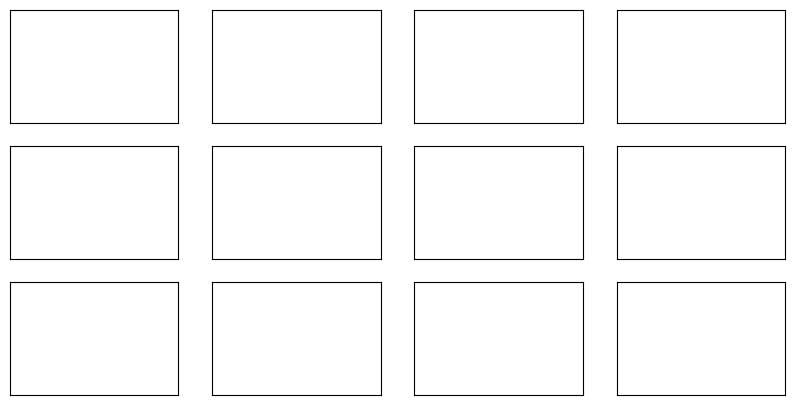

In [188]:
fig, axes = plt.subplots(ncols=4, nrows=3, sharex=True, sharey=True, figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]})

In [189]:
# Ensure inline plotting in Colab
%matplotlib inline

import matplotlib.pyplot as plt


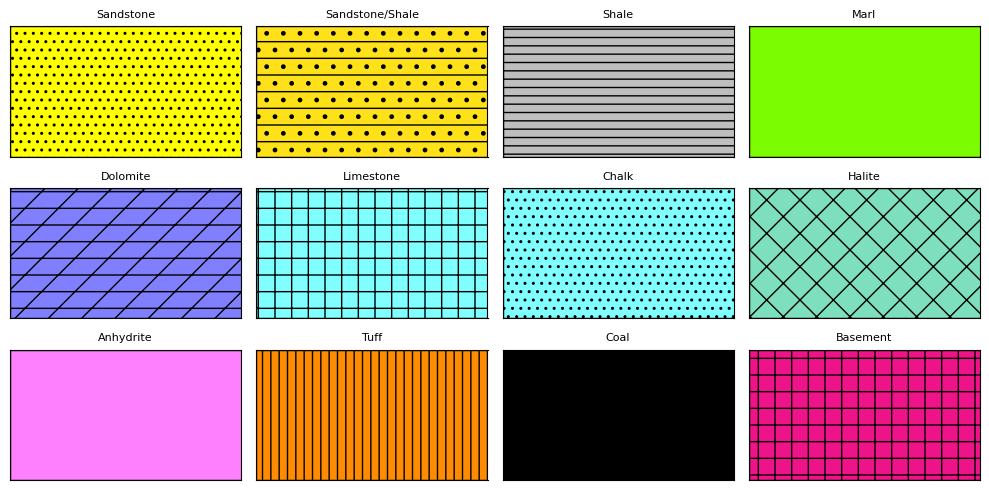

In [190]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4, nrows=3, sharex=True, sharey=True,
                         figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y, color='black')  # Add color to the line for better visibility
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'],
                     hatch=lithology_numbers[key]['hatch'], edgecolor='black')
    ax.set_xlim(0, 0.1)  # Adjusted to match the range of x-values
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']), fontsize=8)

plt.tight_layout()
plt.show()

In [191]:
# Now we setup the well log plot with the Lotho track

In [196]:

# Function to plot well log
def makeplot(well, top_depth, bottom_depth):
    fig, ax = plt.subplots(figsize=(15,10))

    # Set up the plot axes
    ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1, sharey = ax1)
    ax3 = ax2.twiny()  # Twins the y-axis for the density track with the neutron track
    ax4 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1, sharey = ax1)
    #ax5 = plt.subplot2grid((1,3), (0,3), rowspan=1, colspan = 1, sharey = ax1)

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    ax10 = ax1.twiny()
    ax10.xaxis.set_visible(False)
    ax11 = ax2.twiny()
    ax11.xaxis.set_visible(False)
    ax13 = ax4.twiny()
    ax13.xaxis.set_visible(False)


    # Gamma Ray track
    ax1.plot(well["GR"], well['DEPTH_MD'], color = "green", linewidth = 0.5)
    ax1.set_xlabel("Gamma")
    ax1.xaxis.label.set_color("green")
    ax1.set_xlim(0, 200)
    ax1.set_ylabel("Depth (m)")
    ax1.tick_params(axis='x', colors="green")
    ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    ax1.set_xticks([0, 50, 100, 150, 200])


    # Density track
    ax2.plot(well["RHOB"], well['DEPTH_MD'], color = "red", linewidth = 0.5)
    ax2.set_xlabel("Density")
    ax2.set_xlim(1.95, 2.95)
    ax2.xaxis.label.set_color("red")
    ax2.tick_params(axis='x', colors="red")
    ax2.spines["top"].set_edgecolor("red")
    ax2.set_xticks([1.95, 2.45, 2.95])


    # Neutron track placed ontop of density track
    ax3.plot(well["NPHI"], well['DEPTH_MD'], color = "blue", linewidth = 0.5)
    ax3.set_xlabel('Neutron')
    ax3.xaxis.label.set_color("blue")
    ax3.set_xlim(0.45, -0.15)
    ax3.tick_params(axis='x', colors="blue")
    ax3.spines["top"].set_position(("axes", 1.08))
    ax3.spines["top"].set_visible(True)
    ax3.spines["top"].set_edgecolor("blue")
    ax3.set_xticks([0.45,  0.15, -0.15])


    # Lithology track
    ax4.plot(well["LITHOLOGY"], well['DEPTH_MD'], color = "black", linewidth = 0.5)
    ax4.set_xlabel("Lithology")
    ax4.set_xlim(0, 1)
    ax4.xaxis.label.set_color("black")
    ax4.tick_params(axis='x', colors="black")
    ax4.spines["top"].set_edgecolor("black")

    for key in lithology_numbers.keys():
        color = lithology_numbers[key]['color']
        hatch = lithology_numbers[key]['hatch']
        ax4.fill_betweenx(well['DEPTH_MD'], 0, well['LITHOLOGY'], where=(well['LITHOLOGY']==key),
                         facecolor=color, hatch=hatch)


    ax4.set_xticks([0, 1])

    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
    for ax in [ax1, ax2, ax4]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))


    for ax in [ax2, ax3, ax4]:
        plt.setp(ax.get_yticklabels(), visible = False)

    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.15)



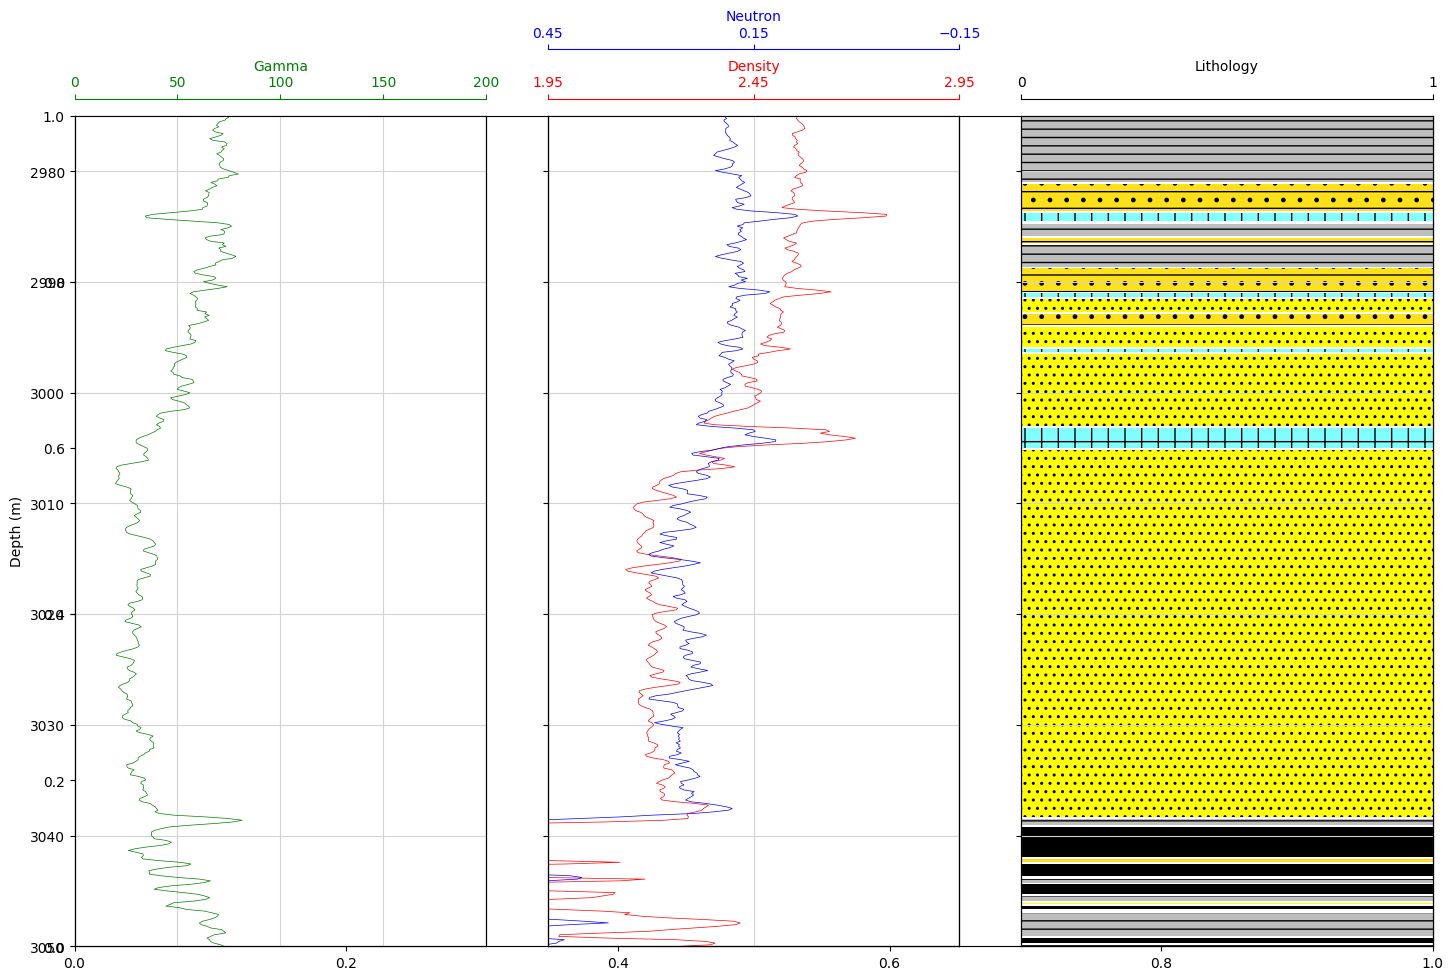

In [197]:
# Call the function with appropriate depth range
makeplot(data, 2975, 3050)
